# CNN

## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

## 1. Load dataset

In [2]:
df = pd.read_csv('/home/sbml/battery_rgb/220503/resize_not_intepolate/data_T25.csv')

In [3]:
set(df['Dataset'].tolist())

{'LFP_25C_0.5-1C_a',
 'LFP_25C_0.5-1C_b',
 'LFP_25C_0.5-1C_c',
 'LFP_25C_0.5-1C_d',
 'NCA_25C_0.5-1C_a',
 'NCA_25C_0.5-1C_b',
 'NCA_25C_0.5-1C_c',
 'NCA_25C_0.5-1C_d',
 'NMC_25C_0.5-1C_a',
 'NMC_25C_0.5-1C_b',
 'NMC_25C_0.5-1C_c',
 'NMC_25C_0.5-1C_d'}

In [6]:
df.columns

Index(['Unnamed: 0', 'Dataset', '#cycle', 'Capacity(dis)', 'SOH', 'RGB',
       'scaled_RGB', 'RGB_length', 'resized', 'resized_scaled'],
      dtype='object')

In [7]:
X = [eval(i) for i in df['resized_scaled'].tolist()]
X = np.array(X)
y = np.array(df['SOH'].tolist()) ##%changed

In [66]:
# labeling for stratified random sampling
label = df['SOH'].tolist()
label_l = []
for cnt in range(len(label)):
    i = label[cnt]
    if i>=1.0 : 
        lab = '1~'
        num = 0
    elif 0.98<=i<1.0 :
        lab = '0.98~1'
        num = 1
    elif 0.96<=i<0.98 :
        lab = '0.96~0.98'
        num = 2
    elif 0.94<=i<0.96 :
        lab = '0.94~0.96'
        num = 3
    elif 0.92<=i<0.94 :
        lab = '0.92~0.94'
        num = 4
    elif 0.90<=i<0.92 :
        lab = '0.90~0.92'
        num = 5
        
    elif 0.88<=i<0.9 :
        lab = '0.88~0.9'
        num = 6
    elif 0.86<=i<0.88 :
        lab = '0.86~0.88'
        num = 7
    elif 0.84<=i<0.86 :
        lab = '0.84~0.86'
        num = 8
    elif 0.82<=i<0.84 :
        lab = '0.82~0.84'
        num = 9
    elif 0.80<=i<0.82 :
        lab = '0.80~0.82'
        num = 10
        

    elif 0.78<=i<0.8 :
        lab = '0.78~0.8'
        num = 11
    elif 0.76<=i<0.78 :
        lab = '0.76~0.78'
        num = 12
    elif 0.74<=i<0.76 :
        lab = '0.74~0.76'
        num = 13
    elif 0.72<=i<0.74 :
        lab = '0.72~0.74'
        num = 14
    elif 0.70<=i<0.72 :
        lab = '0.70~0.72'
        num = 15
        
    else:
        lab = '~0.7'
        num = 16
    label_l.append(num)

## 2. cnn regression

In [33]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3)
for train_idx, test_idx in sss.split(X, np.array(label_l)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = np.array(y)[train_idx], np.array(y)[test_idx]
    y_valid = np.array(label_l)[test_idx]

In [34]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3)
for train_idx, test_idx1 in sss.split(X_test, y_valid):
    X_valid, X_test_f = X_test[train_idx], X_test[test_idx1]
    y_valid, y_test_f = np.array(y_test)[train_idx], np.array(y_test)[test_idx1]
X_valid.shape

(3588, 128, 3)

In [35]:
data_list = []
for i in df['Dataset'][test_idx[test_idx1]].tolist(): 
    if 'LFP' in i:
        data_list.append('LFP')
    if 'NCA' in i:
        data_list.append('NCA')
    if 'NMC' in i:
        data_list.append('NMC')

In [36]:
x_train = X_train
x_valid = X_valid
x_test = X_test_f

In [37]:
rows = len(X[0])
cols = 3
input_shape = (rows, cols, 1)
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
x_valid = x_valid.reshape(x_valid.shape[0], rows, cols, 1)

x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32')/255.0
x_valid = x_valid.astype('float32')/255.0

batch_size = 64
x_train.shape

(11963, 128, 3, 1)

In [44]:
###
model = Sequential()
model.add(Conv2D(32, kernel_size = (2,2), strides = (1,1), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (2,2), strides = (1,1), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))
model.summary()
###

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 3, 32)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 3, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 2, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16256)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1040448   
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                      

In [45]:
start = time.time()
epochs = 40
print('start time : ' , start)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])
hist2 = model.fit(x_train, y_train, epochs = epochs, verbose = 1, validation_data = (x_valid, y_valid))

start time :  1675773199.90521
Epoch 1/40
374/374 [==============================] - 1s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.6110e-04 - val_mse: 7.6110e-04
Epoch 2/40
374/374 [==============================] - 1s 2ms/step - loss: 8.6603e-04 - mse: 8.6603e-04 - val_loss: 5.9604e-04 - val_mse: 5.9604e-04
Epoch 3/40
374/374 [==============================] - 1s 2ms/step - loss: 5.1888e-04 - mse: 5.1888e-04 - val_loss: 4.0920e-04 - val_mse: 4.0920e-04
Epoch 4/40
374/374 [==============================] - 1s 2ms/step - loss: 3.5915e-04 - mse: 3.5915e-04 - val_loss: 2.4801e-04 - val_mse: 2.4801e-04
Epoch 5/40
374/374 [==============================] - 1s 2ms/step - loss: 3.6008e-04 - mse: 3.6008e-04 - val_loss: 3.3184e-04 - val_mse: 3.3184e-04
Epoch 6/40
374/374 [==============================] - 1s 2ms/step - loss: 9.9753e-04 - mse: 9.9753e-04 - val_loss: 3.6407e-04 - val_mse: 3.6407e-04
Epoch 7/40
374/374 [==============================] - 1s 2ms/step - loss: 3.2965e-04 - ms

Text(0.5, 1.0, 'epoch40_loss')

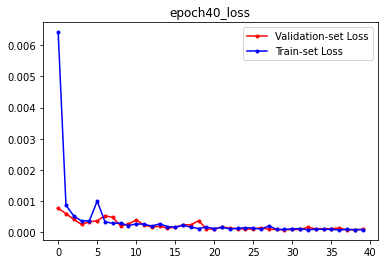

In [47]:
y_vloss = hist2.history['val_loss']
y_loss = hist2.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend()
plt.title('epoch40_loss')

In [48]:
predict = model.predict(x_test, verbose = 0)

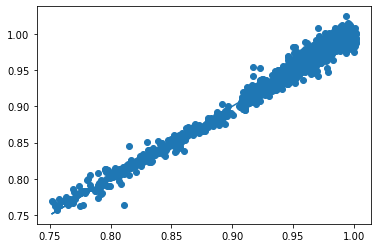

In [50]:
p = []
t = []
for i in range(len(predict)):
    p.append(predict[i])
    t.append(y_test_f[i])
    #print('predicted SOH: ' , predict[i],',' , 'Answer SOH: '  , y_test[i])
    
plt.scatter(y_test_f, predict)
plt.plot(y_test_f, y_test_f)
plt.show()

In [792]:
#model.save('/home/sbml/battery_rgb/220610/resize_not_intepolate/CNN/model_candidates/cnn4.h5')

In [67]:
dic = {}
dic['x_test_SOH'] = t
dic['predict_SOH'] = p
dic['data'] = data_list
data = pd.DataFrame(dic)

In [58]:
r2 = metrics.r2_score(y_test_f, predict)
rmse = metrics.mean_squared_error(y_test_f, predict)**0.5
mse = metrics.mean_squared_error(y_test_f, predict)
mae = metrics.mean_absolute_error(y_test_f, predict)
mape = metrics.mean_absolute_percentage_error(y_test_f,predict)

In [64]:
dic = {}
dic['r2'] = [r2]
dic['rmse'] = [rmse]
dic['mse'] = [mse]
dic['mae'] = [mae]
dic['mape'] = [mape]
d = pd.DataFrame(dic)

In [65]:
d

,r2,rmse,mse,mae,mape
0,0.978934,0.008305,0.000069,0.006278,0.006745
